*A notebook on a shrinkage correction approach where we just run PCA holding 1 single sample at a time for every sample ...*

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import pandas as pd

import pcshrink

# Data prep

Read in the human origins west eurasian data

In [2]:
%%time
data = pcshrink.UnpackedAncestryMap("/project/jnovembre/jhmarcus/ancient-sardinia/data/ref_genotypes/7-11-2018/lazaridis_2014/data_fil")

CPU times: user 8.01 s, sys: 2.45 s, total: 10.5 s
Wall time: 7.67 s


extract a subset just for experimentation

In [ ]:
clst_str = """HGDP01062   F   Sardinian
HGDP01063   M   Sardinian
HGDP01064   F   Sardinian
HGDP01065   F   Sardinian
HGDP01066   M   Sardinian
HGDP01067   M   Sardinian
HGDP01068   F   Sardinian
HGDP01069   M   Sardinian
HGDP01070   F   Sardinian
HGDP01071   M   Sardinian
HGDP01072   F   Sardinian
HGDP01073   M   Sardinian
HGDP01074   F   Sardinian
HGDP01075   M   Sardinian
HGDP01076   M   Sardinian
HGDP01077   M   Sardinian
HGDP01078   F   Sardinian
HGDP01079   M   Sardinian
HGDP01381   F   Adygei
HGDP01382   F   Adygei
HGDP01383   M   Adygei
HGDP01385   M   Adygei
HGDP01386   F   Adygei
HGDP01387   F   Adygei
HGDP01396   M   Adygei
HGDP01397   M   Adygei
HGDP01398   F   Adygei
HGDP01399   F   Adygei
HGDP01400   F   Adygei
HGDP01401   F   Adygei
HGDP01402   M   Adygei
HGDP01403   M   Adygei
HGDP01404   M   Adygei
HGDP00511   M   French
HGDP00512   M   French
HGDP00513   F   French
HGDP00514   F   French
HGDP00515   M   French
HGDP00516   F   French
HGDP00517   F   French
HGDP00518   M   French
HGDP00519   M   French
HGDP00522   M   French
HGDP00523   F   French
HGDP00524   F   French
HGDP00525   M   French
HGDP00526   F   French
HGDP00527   F   French
HGDP00528   M   French
HGDP00529   F   French
HGDP00531   F   French
HGDP00533   M   French
HGDP00534   F   French
HGDP00535   F   French
HGDP00536   F   French
HGDP00537   F   French
HGDP00538   M   French
HGDP00539   F   French"""


In [ ]:
clst_str = """HGDP01062   F   Sardinian
HGDP01063   M   Sardinian
HGDP01064   F   Sardinian
HGDP01065   F   Sardinian
HGDP01066   M   Sardinian
HGDP01067   M   Sardinian
HGDP01068   F   Sardinian
HGDP01069   M   Sardinian
HGDP01070   F   Sardinian
HGDP01071   M   Sardinian
HGDP01072   F   Sardinian
HGDP01073   M   Sardinian
HGDP01074   F   Sardinian
HGDP01075   M   Sardinian
HGDP01076   M   Sardinian
HGDP01077   M   Sardinian
HGDP01078   F   Sardinian
HGDP01079   M   Sardinian
HGDP01381   F   Adygei
HGDP01382   F   Adygei
HGDP01383   M   Adygei
HGDP01385   M   Adygei
HGDP01386   F   Adygei
HGDP01387   F   Adygei
HGDP01396   M   Adygei
HGDP01397   M   Adygei
HGDP01398   F   Adygei
HGDP01399   F   Adygei
HGDP01400   F   Adygei
HGDP01401   F   Adygei
HGDP01402   M   Adygei
HGDP01403   M   Adygei
HGDP01404   M   Adygei
HGDP00511   M   French
HGDP00512   M   French
HGDP00513   F   French
HGDP00514   F   French
HGDP00515   M   French
"""


clsts = list(map(lambda x: x.split('   '), clst_str.split("\n")))
clst_df = pd.DataFrame(clsts)
clst_df.columns = ["iid", "sex", "clst"]

ind_df = pd.DataFrame({"iid": data.inds})
ind_df

mrg_df = ind_df.reset_index().merge(clst_df, how="inner", on="iid")
idx = mrg_df["index"].as_matrix()

In [4]:
#Y = data.Y[:, idx]
Y = data.Y
p, n = Y.shape
print(p, n)

594924 777


In [5]:
%%time
norm = pcshrink.Normalizer(Y, .02, "patterson")

CPU times: user 24.1 s, sys: 9.67 s, total: 33.8 s
Wall time: 5.48 s


# PCA

In [6]:
%%time
k = 5
cor = pcshrink.ShrinkageCorrector(norm.Y, k)

CPU times: user 1min, sys: 1.84 s, total: 1min 2s
Wall time: 2.44 s


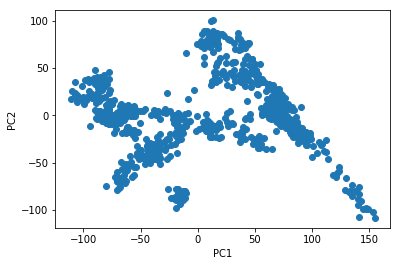

In [7]:
plt.scatter(cor.L[:,0], -cor.L[:,1])
plt.xlabel("PC1");
plt.ylabel("PC2");

In [ ]:
%%time
cor.jackknife(q=5, o=2)

In [ ]:
plt.scatter(cor.L[:, 0], cor.L_shrunk[:, 0])
cor.L_shrunk[:, 0].shape
cor.L[:, 0].shape

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression(fit_intercept=False, normalize=False)
regr.fit(cor.L_shrunk[:,0].reshape(n, 1), cor.L[:, 0].reshape(n, 1))
regr.coef_

In [ ]:
plt.scatter(cor.L[:, 0], -cor.L[:, 1], color="black")
plt.scatter(cor.L_shrunk[:, 0], -cor.L_shrunk[:, 1], color="blue")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(cor.L[:, 0], -cor.L[:, 1], label="full")
plt.scatter(cor.L_shrunk[:, 0], -cor.L_shrunk[:, 1], label="projected")
plt.scatter(cor.tau[0] * cor.L_shrunk[:, 0], -cor.tau[1] * cor.L_shrunk[:, 1], label="corrected")
plt.legend()
plt.xlabel("PC1");
plt.ylabel("PC2");

---

In [ ]:
plt.figure(figsize=(10, 8))
plt.quiver(L[:,0], 
           -L[:, 1], 
           L_[:, 0] - L[:,0],
           -(L_[:, 1] - L[:, 1]), headwidth=2)

plt.xlabel("PC1");
plt.ylabel("PC2");
plt.ylim()
plt.autoscale()


Plot PC1 vs PC2

In [ ]:
%%time

K = 10
q = data.n
L_proj = np.empty((q, K))

for i in range(q):
    
    print(i)
    
    idx = np.ones(data.n, dtype="bool")
    idx[i] = False
    
    z = Z[:, i]
    Z_train = Z[:, idx]
    
    L_proj[i, :] = holdout_pca(z, Z_train, K)
    
#np.save("data/L_proj", L_proj)

In [ ]:
#L_proj = L_proj / np.linalg.norm(L_proj, axis=0, ord=2)

In [ ]:
plt.scatter(L[:, 0], -L[:,1])

In [ ]:
plt.scatter(L_proj[:, 0], -L_proj[:, 1])

In [ ]:
plt.figure(figsize=(12, 8))
#plt.quiver(L_proj[0,0], -L_proj[0,1], L[0,0], -L[0,1],)
plt.quiver(L[:,0], -L[:,1], L_proj[:,0]-L[:,0], -(L_proj[:,1]-L[:,1]))

plt.xlabel("PC1");
plt.ylabel("PC2");
plt.tight_layout()

In [ ]:
#plt.quiver(X=L[:,0], Y=-L[:,1], U=L_proj[:,0], V=-L_proj[:,1])
#plt.xlabel("PC1");
#plt.ylabel("PC2");

lines = []
for i in range(L.shape[0]):
    lines.append([(L[i, 0], -L[i, 1]), (L_proj[i, 0], -L_proj[i, 1])])
    
lc = mc.LineCollection(lines, linewidths=2, colors="black")
fig, ax = plt.subplots(figsize=(12, 8))
ax.add_collection(lc)
ax.autoscale()

plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
np.random.choice(Z.shape[0], 10, replace=False)